# Neural Networks II: Deeper into model building, training and opmitization.

So far, we have built neural networks manually — defining layers as functions, tracking parameters ourselves, and manually coding the training loop. This is a great way to **learn how things work under the hood**.

But in the real-world, doing everything manually is slow to write, easy to make mistakes and hard to scale.

This week, we step into `nn.Module` in `PyTorch`. It helps us:

- Organize our code in reusable blocks (just like in scikit-learn)
- Track model parameters automatically.
- Powerful tools for training and optimization.

By the end of this class, you will be able to:

- Understand PyTorch's `nn.Module` abstraction
- Build a multi-layer perceptron (MLP) using `nn.Module`
- Learn about the role of loss functions and optimizers
- Train and evaluate a model

In [1]:
# Imports for the class
import numpy as np
import torch
import torch.nn as nn

## 1. Defining a model through `nn.Module`

`nn.Module` is class that provides flexibility to build more complex models. The minimal ingredients when using this class are not that far from what we have been doing:

a- The signature of the class  
b- We define `__init__()`  
c- A `forward()` method that specifies how input data passes through all these layers.  

let's go step by step, for this

### a. Signature of the class

Here, this class will inherit from `nn.Module`.  

In [2]:
class MyModel(nn.Module):
    pass

### b. `__init__()`

This is the constructor of the class that defines the architecture (layers) of the class. 

In this case we do not need to include the parameters explicitly. We can define these through particular layers, and then join them in a list, sorting them according to their order. We put all layers in the `nn.ModuleList` object, which is just a list object composed of nn.Module items

In [3]:
class MyModel(nn.Module):

    def __init__(self):
        super().__init__()
        l1 = nn.Linear(2, 4)
        a1 = nn.ReLU()
        l2 = nn.Linear(4, 1)
        a2 = nn.Sigmoid()
        l = [l1, a1, l2, a2]
        self.module_list = nn.ModuleList(l)

Notice that we put all layers in the `nn.ModuleList` object, which is just a list object composed of `nn.Module` items. This makes the code more readable and easier to follow. 

### c.`forward()` 

It implements specifies how input data passes through the list of layers.  

In [4]:
class MyModel(nn.Module):

    def __init__(self):
        super().__init__()
        l1 = nn.Linear(2, 4)
        a1 = nn.ReLU()
        l2 = nn.Linear(4, 1)
        a2 = nn.Sigmoid()
        l = [l1, a1, l2, a2]
        self.module_list = nn.ModuleList(l)

    def forward(self, X):
        for f in self.module_list:
            X = f(X)
        return X

### Usage

Now we only need to instantiate the model and we can start using it!

In [5]:
# Instantiation
model = MyModel()

# Input data (it needs to have 2 features)
X = torch.Tensor([[0.1, 0.7], [0.1, 0.7]])

# And we can just pass this data to the model
model(X)

tensor([[0.4462],
        [0.4462]], grad_fn=<SigmoidBackward0>)

<div class="alert alert-block alert-info">
    
🧐🧐 **PAY ATTENTION** 🧐🧐

As you can, we were able to generate the output by just passing to the model object the input between parenthesis. That is, we did not need to call the method `forward` to do this. That's because our class is using implicitly.

💡**BUT**💡That is a capability of `nn.Module`, which we are inheriting from. See what happens if we don't inherit from this class and try to do the same:
</div>

In [6]:
class MyModelNoModule(object):

    def __init__(self):
        super().__init__()
        l1 = nn.Linear(2, 4)
        a1 = nn.ReLU()
        l2 = nn.Linear(4, 1)
        a2 = nn.Sigmoid()
        l = [l1, a1, l2, a2]
        self.module_list = nn.ModuleList(l)

    def forward(self, X):
        for f in self.module_list:
            X = f(X)
        return X

In [7]:
model_2 = MyModelNoModule()
model_2(X)

TypeError: 'MyModelNoModule' object is not callable

it would only work if we explicitly call the method `forward`

In [8]:
model_2.forward(X)

tensor([[0.4621],
        [0.4621]], grad_fn=<SigmoidBackward0>)

> **Question**: Each time you run the cell where we instantiated and used the model you get a different output despite having the same input. Why do you think this is?

### Main components

#### Layers

Layers in `Pytorch` include transformations from one layer to the other of the neural network. 

These transformations typically depend on certain weights $W$. In `Pytorch` once you define a layer with its **architecture**, i.e. the expected number of inputs and ouputs, the weights are initialized to a random value.

**These weights are what we learn during training.**

In standard neural network we woud typically use `nn.Linear`, which is the usual linear transformation to the incoming data. Specifically, given an input sample with `in_features`, this would yield $k$ `out_features` as: $h_k = \sum_{j=1}^{\mbox{in\_features}} x_j W_{jk} + b_k$ 

This is a class, with arguments :
- `in_features` and `out_features` are the size of each input and output sample respectively.

In [9]:
# 1 input -> 2 outputs
m = nn.Linear(1, 2)
input = torch.tensor([1.0])
output = m(input)
print(output.size(), output)

torch.Size([2]) tensor([-0.2407, -0.8709], grad_fn=<ViewBackward0>)


> **Question**: This layer was able to produce an output just passing the input in parenthesis. Why do you think this is?

#### Activations

Activations just transforms

- `nn.Relu`

In [10]:
m = nn.ReLU()
input = torch.tensor([-0.1, 0.4, -0.3, 0.1])
output = m(input)
output

tensor([0.0000, 0.4000, 0.0000, 0.1000])

- `nn.Sigmoid`

In [11]:
m = nn.Sigmoid()
input = torch.tensor([-0.9, 0., -5, 5])
output = m(input)
output

tensor([0.2891, 0.5000, 0.0067, 0.9933])

- `nn.Tanh`: Hyperbolic Tangent (Tanh) function

In [12]:
m = nn.Tanh()
input = torch.tensor([-0.9, 0., -5, 5])
output = m(input)
output

tensor([-0.7163,  0.0000, -0.9999,  0.9999])

- `nn.Softmax`: softmax function to an n-dimensional input. This is the typical layer for multi-class problems!

In [13]:
m = nn.Softmax(dim=1)
input = torch.tensor([[-0.9, 0., -1, 1]])
output = m(input)
print(output)

print(output.sum())

tensor([[0.0905, 0.2226, 0.0819, 0.6050]])
tensor(1.0000)


## 2. Training the model

This is when the created model is fitted with respect to our data (normally the training set). During this process, our cost function is minimized, and the parameters of our model learned.

So far, we have been doing this for a given cost function (e.g. Mean Square Error) through a loop implementing stochastic gradient descent.

We will now fully leverage `pytorch` to use their already implemented cost functions and more importantly, optimizers. This mean we won't need to restrict to stochastic gradient descent but we could adopt other, sometimes, more suitable ones. 

In [14]:
class MyModel(nn.Module):

    def __init__(self):
        super().__init__()
        l1 = nn.Linear(2, 10)
        a1 = nn.ReLU()
        l2 = nn.Linear(10, 1)
        a2 = nn.Sigmoid()
        l = [l1, a1, l2, a2]
        self.module_list = nn.ModuleList(l)

    def forward(self, X):
        for f in self.module_list:
            X = f(X)
        return X

class MyModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2, 10)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(10, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.sigmoid(x)
        return x


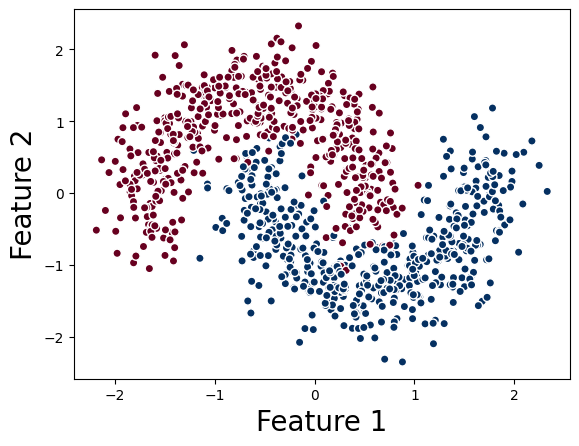

In [15]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pylab as plt

X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).reshape(-1, 1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).reshape(-1, 1)

plt.scatter(X[:,0], X[:,1], c=y, cmap="RdBu", edgecolors='w', alpha=1)
plt.xlabel("Feature 1", size=20)
plt.ylabel("Feature 2", size=20)
plt.show()

In [16]:
from torch import optim

model = MyModel()

cost_function = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

n_epochs = 100
train_costs = []
test_costs = []

for epoch in range(n_epochs):
    model.train() # 
    running_cost = 0
    accuracy_hist_train = 0
    randperm = torch.randperm(X_train.shape[0])
    for ii in randperm:
        x_batch, y_batch = X_train[ii], y_train[ii]
        optimizer.zero_grad()
        y_probs = model(x_batch)
        cost = cost_function(y_probs, y_batch)
        cost.backward()
        optimizer.step()
        running_cost += cost.item()

    train_costs.append(running_cost / X_train.shape[0])

    # Print loss every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch {epoch+1}: Train Loss = {train_costs[-1]:.4f}")

Epoch 1: Train Loss = 0.3778
Epoch 11: Train Loss = 0.2342
Epoch 21: Train Loss = 0.1470
Epoch 31: Train Loss = 0.1105
Epoch 41: Train Loss = 0.0970
Epoch 51: Train Loss = 0.0918
Epoch 61: Train Loss = 0.0890
Epoch 71: Train Loss = 0.0853
Epoch 81: Train Loss = 0.0821
Epoch 91: Train Loss = 0.0831


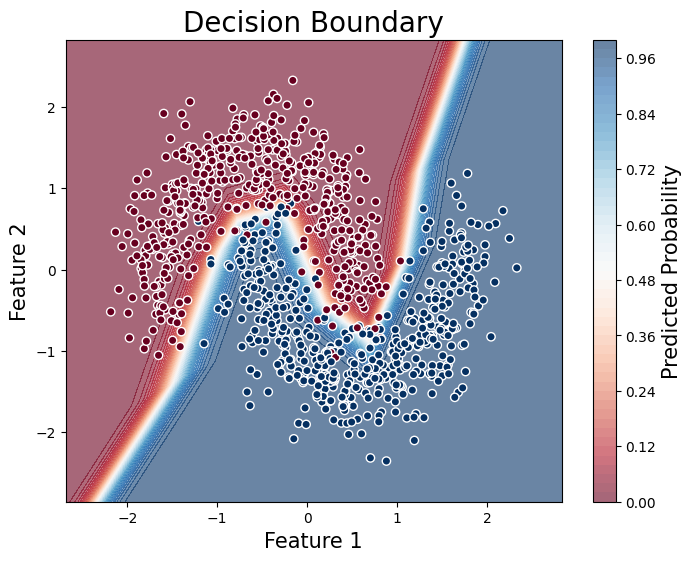

In [17]:
# Create a grid of points covering the feature space
x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
xx, yy = np.meshgrid(
    np.linspace(x_min, x_max, 1000),
    np.linspace(y_min, y_max, 1000)
)
grid = np.c_[xx.ravel(), yy.ravel()]
grid_tensor = torch.tensor(grid, dtype=torch.float32)

# Get model predictions on the grid
with torch.no_grad():
    probs = model.forward(grid_tensor).numpy().reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, probs, levels=50, cmap="RdBu", alpha=0.6)
cbar = plt.colorbar()
cbar.set_label("Predicted Probability", size=15)
cbar.ax.tick_params(labelsize=10)
# Overlay training data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="RdBu", edgecolors='w', alpha=1)
plt.title("Decision Boundary", size=20)
plt.xlabel("Feature 1", size=15)
plt.ylabel("Feature 2", size=15)
plt.show()

## 3. Testing the model

In [18]:
model.eval()  # Important: disable dropout, batchnorm, etc.
test_cost = 0.0
correct = 0
total = 0

with torch.no_grad():  # No gradient tracking
    for ii in range(X_test.shape[0]):
        x_batch, y_batch = X_test[ii], y_test[ii]
        probs = model(x_batch)
        cost = cost_function(probs, y_batch)
        test_cost += cost.item() 
        predictions = (probs > 0.5).float() 
        correct += (predictions == y_batch).sum().item()
        total += y_batch.size(0)

avg_test_loss = test_cost / total
accuracy = correct / total

print(f"Test Loss: {avg_test_loss:.4f}, Test Accuracy: {accuracy:.2%}")

Test Loss: 0.0549, Test Accuracy: 97.50%


<div class="alert alert-block alert-info">

𝐈𝐌𝐏𝐎𝐑𝐓𝐀𝐍𝐓‼️ 

Technically, we did not need to test each individual sample in the test set, especially if the data is small. We could have directly passed the whole test set.
</div>

In [19]:
# Using the whole test
from sklearn.metrics import accuracy_score

model.eval() # 
with torch.no_grad():
    probs = model.forward(X_test)
    test_cost = cost_function(probs, y_test)
    y_pred = (probs > 0.5).detach().numpy().flatten()
    
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Loss: {test_cost:.4f}, Test Accuracy: {accuracy:.2%}")

Test Loss: 0.0549, Test Accuracy: 97.50%


🚨🚨 But in practice, it is recommended to follow the same approach as in the training set when handling individual samples. This keeps your pipeline consistent and reduces the chance of confusion or bugs.

🚨🚨 In addition, as we will see later, when using batches (rather than single samples), this is both more memory- and computation-efficient, and it scales better for larger datasets and models.

### Cost functions

The module `nn` has a lot of implementations. Here are a few major and standard ones:

- `nn.MSELoss`: Mean squared error (squared L2 norm) between each element in the input x and target y. Cost function for **standard regression** tasks.
- `nn.BCELoss`: Binary Cross Entropy between the target and the input probabilities. Cost function for standard **binary classification** tasks.
- `nn.CrossEntropyLoss`: Cross entropy loss between input logits and target. It is useful in **multi-class classification** problems. (See documenation to check how it interact with the outputs)

You can check the [loss-functions documentation](https://docs.pytorch.org/docs/stable/nn.html#loss-functions) for more.

Let's suppose we are doing a binary classification task, so then we would choose a Binary Cross Entropy.

In [20]:
# Example of target with class indices
loss = nn.CrossEntropyLoss()
input = torch.randn(3, 5, requires_grad=True)
target = torch.empty(3, dtype=torch.long).random_(5)
output = loss(input, target)
output.backward()

print(output)

tensor(1.6398, grad_fn=<NllLossBackward0>)


### Optimizers

We will use `torch.optim`, which is a package implementing various optimization algorithms.

To use `torch.optim`, you need to define an optimizer object, which will hold the current state and will update the parameters based on the computed gradients.

For example, the following are the same optimizers that you can find for `MLPClassifier` and `MLPRegresssor` in `scikit-learn`

- `torch.optim.SGD`:  Stochastic Gradient Descent. Widely used in practice for both simple and deep models. It may lead to better generalization than adaptive methods (like Adam; see next) due its flexibility to tune parameters.

- `torch.optim.Adam`: Optimizer method that adapts the learning rate. Therefore, it typically requires minimal tuning. A default for deep learning. Requires minimal tuning.

- `torch.optim.LBFGS`:  A quasi-Newton method that approximates the inverse Hessian matrix. It is useful for smaller datasets and optimization problems requiring very precise convergence. Less commonly used in deep learning. 

`PyTorch` includes many more optimizers beyond the ones we've covered. You can find a more extensive list in [PyTorch's optimization algorithms](https://pytorch.org/docs/stable/optim.html#algorithms).

In practice, **SGD and Adam are by far the most commonly used**, and we will be using these two for the rest of the module on neural networks.

<div class="alert alert-block alert-warning">

**NOTE!!!**
    
`nn.LBFGS` requires a special mechanism called a *closure* during optimization, which makes it more cumbersome to use. If you're curious, you can read more about it in the [official PyTorch documentation](https://pytorch.org/docs/stable/optim.html#optimizer-step-closure).

</div>


## 3. Improving Training with Batches

Up to now, we have been training our models so weights were being updated after using each individual training sample. This is the main behavior behind **Stochastic Gradient Descent**.

However, in practice, this can make training problematic due to:

- Slower and less stable convergence.
- Noisy gradient updates
  
We can improve this by using **batches** of training samples, i.e. by considering several samples simultaneously to update our parameters.

We will see that this is very easy to do in `PyTorch` through `DataLoader`.


In [21]:
from torch.utils.data import TensorDataset, DataLoader

# Define batch size
batch_size = 16

# Wrap the data in a TensorDataset and DataLoader
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [22]:
from torch import optim

model = MyModel()

cost_function = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

n_epochs = 100
train_costs = []
test_costs = []

for epoch in range(n_epochs):
    model.train() # 
    running_cost = 0
    accuracy_hist_train = 0
    #randperm = torch.randperm(X_train.shape[0])
    #for ii in randperm:
    for x_batch, y_batch in train_loader:
        #x_batch, y_batch = X_train[ii], y_train[ii]
        optimizer.zero_grad()
        y_probs = model(x_batch)
        cost = cost_function(y_probs, y_batch)
        cost.backward()
        optimizer.step()
        running_cost += cost.item()

    train_costs.append(running_cost / X_train.shape[0])

    # Print loss every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch {epoch+1}: Train Loss = {train_costs[-1]:.4f}")

Epoch 1: Train Loss = 0.0365
Epoch 11: Train Loss = 0.0210
Epoch 21: Train Loss = 0.0191
Epoch 31: Train Loss = 0.0187
Epoch 41: Train Loss = 0.0185
Epoch 51: Train Loss = 0.0183
Epoch 61: Train Loss = 0.0182
Epoch 71: Train Loss = 0.0181
Epoch 81: Train Loss = 0.0180
Epoch 91: Train Loss = 0.0179


With just a few lines of code, we have switched from stochastic to batch training!

`DataLoader` gives us clean and efficient batch processing, and prepares us to handle larger datasets in future labs.



In [23]:
model.eval()  # Important: disable dropout, batchnorm, etc.
test_cost = 0.0
correct = 0
total = 0

with torch.no_grad():  # No gradient tracking
    for x_batch, y_batch in test_loader:
        probs = model(x_batch)
        cost = cost_function(probs, y_batch)
        test_cost += cost.item() * x_batch.size(0)  
        predictions = (probs > 0.5).float() 
        correct += (predictions == y_batch).sum().item()
        total += y_batch.size(0)

avg_test_loss = test_cost / total
accuracy = correct / total

print(f"Test Loss: {avg_test_loss:.4f}, Test Accuracy: {accuracy:.2%}")

Test Loss: 0.2825, Test Accuracy: 86.50%


In [24]:
from sklearn.metrics import accuracy_score
# Get model predictions on the grid
with torch.no_grad():
    probs = model.forward(X_test).detach().numpy().flatten()
    y_pred = (probs > 0.5)
print(accuracy_score(y_test.numpy(), y_pred))

0.865


## 4. Summary

To Be Completed

## 📝 5. Exercises

### 5.1 Exercise — Adapting to Multiclass and Regression

Replicate the same architecture and training loop from class, but apply it to the following tasks:

1. **Multiclass Classification**
   - Use `sklearn.datasets.make_classification` 
   - Modify the final layer to output `n_classes` units
   - Use `nn.CrossEntropyLoss`
   - No activation function at the output (CrossEntropy expects raw logits)

2. **Regression**
   - Use `sklearn.datasets.make_regression`
   - Final layer should output a single unit
   - Use `nn.MSELoss`
   - No activation function at the output layer

In both cases, assume a batch size different than 1. 

🧠 *Hint*: Each task needs a different loss function and output layer. Be careful with data shapes and target formats.

In [327]:
#YOUR CODE

### 5.2 Exercise  — Compare Optimizers and Batch Sizes

Train the binary classification model from class using different optimizers:

- `torch.optim.SGD`
- `torch.optim.Adam`

Keep the same architecture, data, and number of epochs for each run. Compare:

- Final training loss
- Training stability (does one converge more smoothly than others?)
- Test accuracy (optional)

Also, experiment with different **batch sizes** (e.g., 1, 8, 32, 64) and compare:

- Training performance (e.g., convergence speed, final loss)
- Computational time

**Reflect**: What do you notice when using very small vs. very large batches? Which optimizer converges fastest? Which one performs best?

In [328]:
#YOUR CODE